## Inspect Data:

In [1]:
# Inspect data modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay
import missingno
import seaborn as sns

In [2]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_df.shape, test_df.shape

((8693, 14), (4277, 13))

In [5]:
display(train_df.isna().sum(), test_df.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

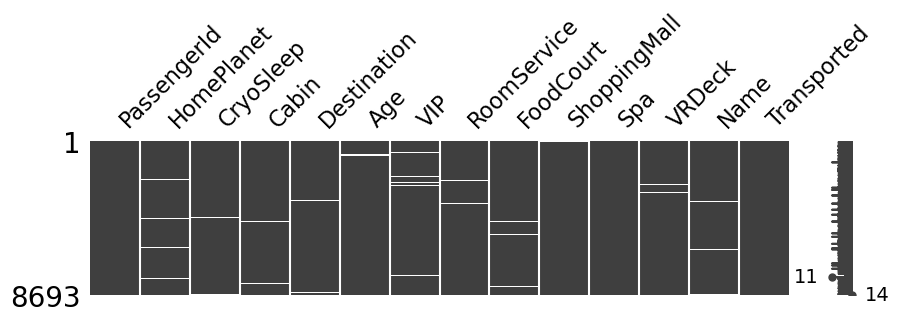

In [6]:
missingno.matrix(train_df, figsize=(10,2));

In [7]:
train_df['CryoSleep'] = train_df['CryoSleep'].replace({True: 1, False: 0})
train_df['VIP'] = train_df['VIP'].replace({True: 1, False: 0})
train_df['Transported'] = train_df['Transported'].replace({True: 1, False: 0})

In [8]:
display('Train'.center(80), train_df.describe().T.style.background_gradient(cmap = "magma"), 'test'.center(80), test_df.describe().T.style.background_gradient(cmap = "magma"))

'                                     Train                                      '

,count,mean,std,min,25%,50%,75%,max
CryoSleep,8476.000000,0.358306,0.479531,0.000000,0.000000,0.000000,1.000000,1.000000
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000
VIP,8490.000000,0.023439,0.151303,0.000000,0.000000,0.000000,0.000000,1.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000
Transported,8693.000000,0.503624,0.500016,0.000000,0.000000,1.000000,1.000000,1.000000


'                                      test                                      '

,count,mean,std,min,25%,50%,75%,max
Age,4186.000000,28.658146,14.179072,0.000000,19.000000,26.000000,37.000000,79.000000
RoomService,4195.000000,219.266269,607.011289,0.000000,0.000000,0.000000,53.000000,11567.000000
FoodCourt,4171.000000,439.484296,1527.663045,0.000000,0.000000,0.000000,78.000000,25273.000000
ShoppingMall,4179.000000,177.295525,560.821123,0.000000,0.000000,0.000000,33.000000,8292.000000
Spa,4176.000000,303.052443,1117.186015,0.000000,0.000000,0.000000,50.000000,19844.000000
VRDeck,4197.000000,310.710031,1246.994742,0.000000,0.000000,0.000000,36.000000,22272.000000


#### We can see that in the spent money features, there is a separation between low and high prices 
* So let's inspect RoomService, FoodCourt, ShoppingMall, Spa and VRDeck

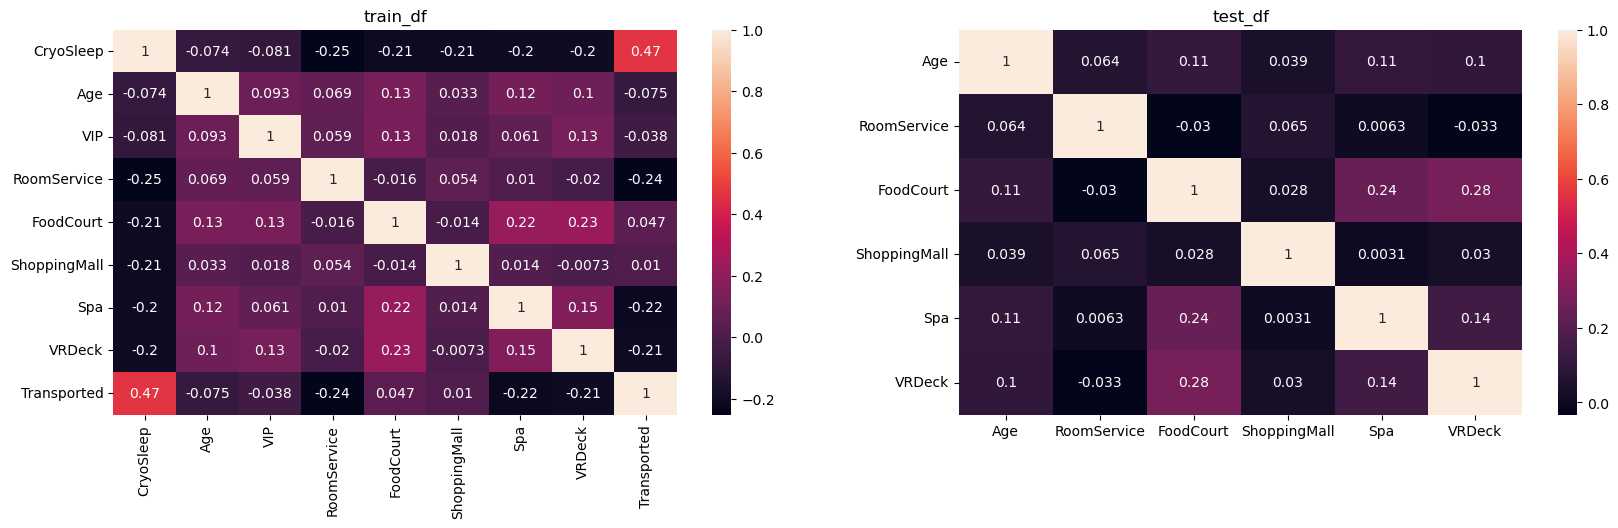

In [9]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
train_cm = train_df.corr(numeric_only=True) 
ax1 = sns.heatmap(ax=axes[0], data=train_cm, annot=True)
ax1.set(title='train_df')

test_cm = test_df.corr(numeric_only=True)
ax2 = sns.heatmap(ax=axes[1], data=test_cm, annot=True)
ax2.set(title='test_df')

plt.show()

## We can see the exist a correlation between the Transported and (VRDeck, Spa, RoomService)
* Let's explore this features

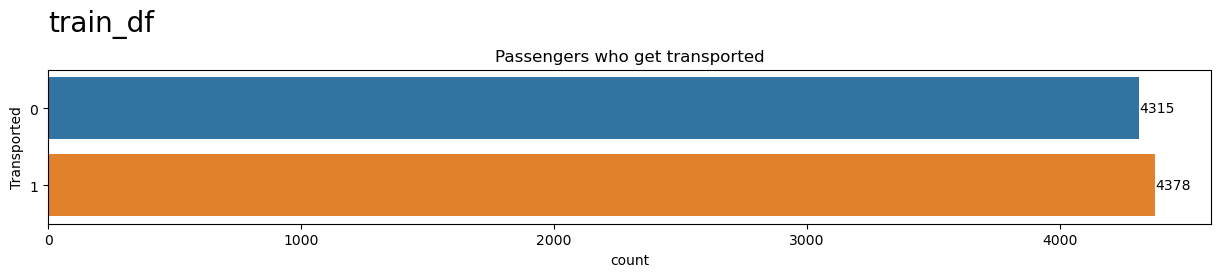

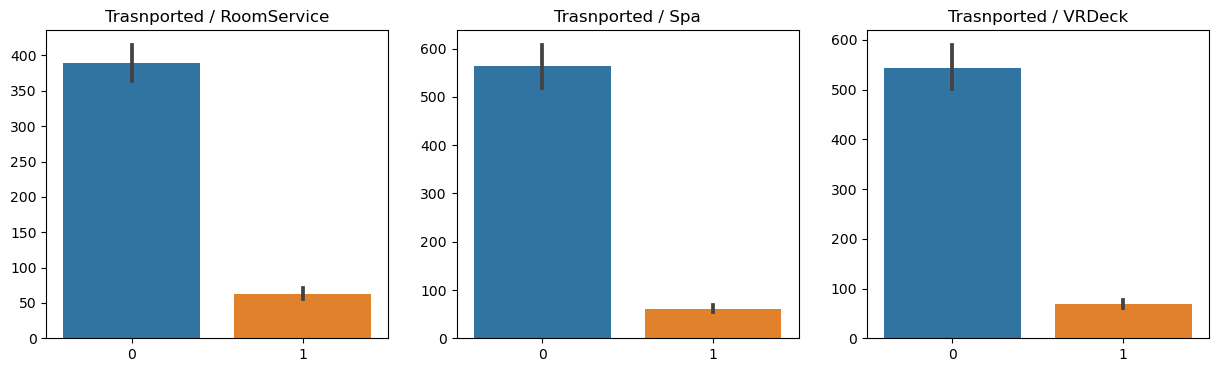

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 2))
counts_trans = train_df['Transported'].value_counts().rename_axis('Transported').reset_index(name='count')
ax1 = sns.barplot(ax=axes, data=counts_trans, x='count', y='Transported', orient='h')
ax1.bar_label(container=ax1.containers[0])
ax1.set_title('Passengers who get transported')

plt.text(x=0, y=-1, s="train_df", fontsize=20, color='black')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
labels = ['RoomService', 'Spa', 'VRDeck']
for i in range(len(labels)):
    ax = sns.barplot(ax=axes[i], data=train_df, x='Transported', y=labels[i])
    ax.set(title=f'Trasnported / {labels[i]}', ylabel='', xlabel='')   
plt.show();

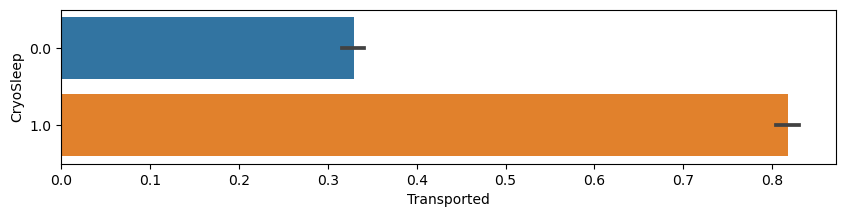

Total CryoSleep: 3037
CryoSleep and Transported: 2483 - 81.76%


In [80]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,2))
ax = sns.barplot(data=train_df, x='Transported', y='CryoSleep', orient='h')
plt.show()
count = 0
for n in range(len(train_df)):
    if train_df.iloc[n]['CryoSleep'] == 1 and train_df.iloc[n]['Transported'] == 1:
        count += 1

cryo_tran_percent = count * 100 / train_df['CryoSleep'].where(train_df['CryoSleep']== 1).count()        
print(f"Total CryoSleep: {train_df['CryoSleep'].where(train_df['CryoSleep'] == 1).count()}")
print(f"CryoSleep and Transported: {count} - {cryo_tran_percent:.2f}%")

#### Where CryoSleep == True there are a lot of possibilities of get Transported

In [11]:
# For count the groups size ej.: 0003_04 -> group 3 , group_size 4

train_df[["Group", "Group_Size"]] = train_df["PassengerId"].str.split('_', expand=True)
train_df["Group_Size"] = train_df["Group"].map(lambda x: train_df["Group"].value_counts(ascending=True)[x])

test_df[["Group", "Group_Size"]] = test_df["PassengerId"].str.split('_', expand=True)
test_df["Group_Size"] = test_df["Group"].map(lambda x: test_df["Group"].value_counts(ascending=True)[x])

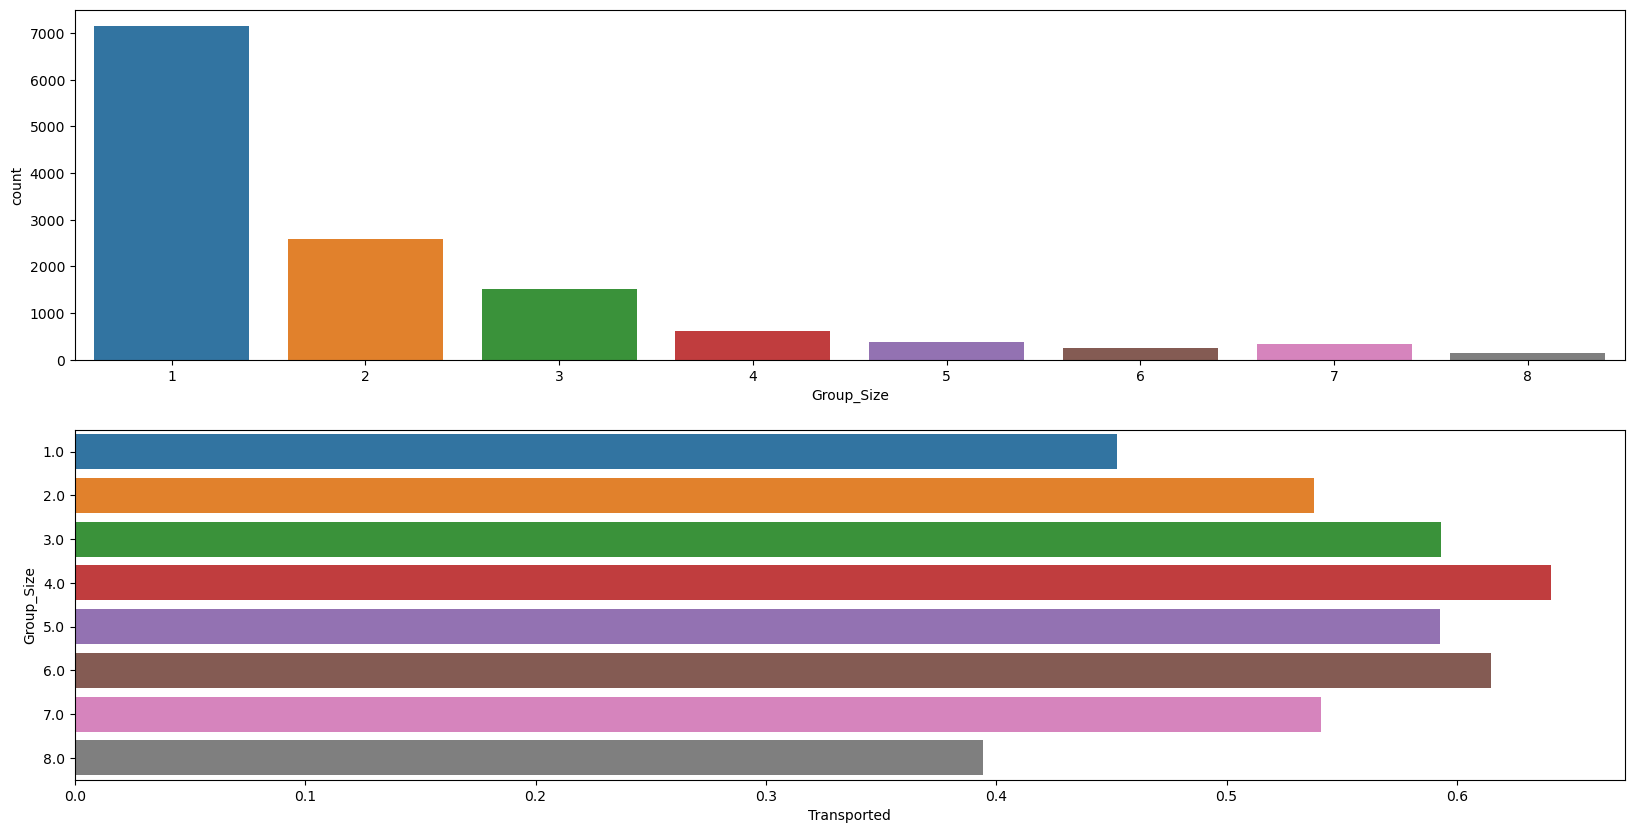

In [12]:
temp_df = train_df[['Group_Size', 'Transported']].groupby(train_df['Group_Size']).agg('mean').sort_values('Transported').reset_index(drop=True)
concat_df = pd.concat([train_df, test_df])
counts_group_size = concat_df['Group_Size'].value_counts().rename_axis('Group_Size').reset_index(name='count')

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(20, 10))
ax1 = sns.barplot(ax=axes[0], orient='v', data=counts_group_size, x='Group_Size', y='count')
ax2 = sns.barplot(ax=axes[1], orient='h', data=temp_df, x='Transported', y='Group_Size')


#### We can see that the group 1 are the biggest but less than 50% of the group are transported

## Now let's explore the Homeplanet and Destination

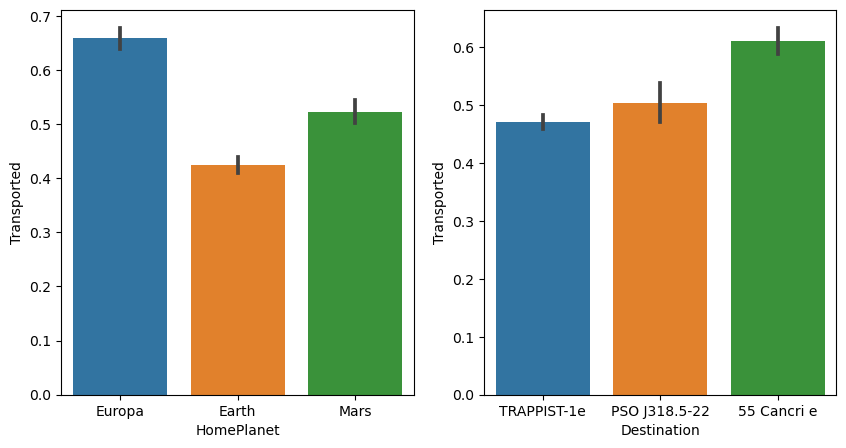

In [192]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1 = sns.barplot(ax=axes[0], data=train_df, y='Transported', x='HomePlanet', orient='v')
ax2 = sns.barplot(ax=axes[1], data=train_df, y='Transported', x='Destination', orient='v')
plt.show()

### From Europa and destination to 55 Cancri passengers have more chances to get Transported
* Let's see the numbers from both

In [193]:
def compare_columns(title, col, col_val, col_to_com, col_to_com_val):
    col_total = col.count()
    col_val_total = col.where(col == col_val).count()
    count = 0
    for n in range(len(col)):
        if col.iloc[n] == col_val and col_to_com.iloc[n] == col_to_com_val:
            count += 1
    percent_col_val = count * 100 / col_val_total
    percent_col = count * 100 / col_total
    print(f'\033[1m{title}\033[0m\n')
    print(f'{col.name} Total -> {col_total}')
    print(f'{col_val} Total -> {col_val_total}')
    print(f'{col.name} = {col_val} and {col_to_com.name} = {col_to_com_val}:')
    print(f'\t* Total: {count} ')
    print(f'\t* {col_val} percent: {percent_col_val:.2f}%')
    print(f'\t* {col.name} percent: {percent_col:.2f}%')

In [189]:
train_df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [194]:
compare_columns('Passenger from Europa and Transported',
                train_df['HomePlanet'], 'Europa',
                train_df['Transported'], 1)

compare_columns('Passenger destination 55 Cancri e and Transported',
                train_df['Destination'], '55 Cancri e',
                train_df['Transported'], 1)

Passenger from Europa and Transported

HomePlanet Total -> 8492
Europa Total -> 2131
HomePlanet = Europa and Transported = 1:
	* Total: 1404 
	* Europa percent: 65.88%
	* HomePlanet percent: 16.53%
Passenger destination 55 Cancri e and Transported

Destination Total -> 8511
55 Cancri e Total -> 1800
Destination = 55 Cancri e and Transported = 1:
	* Total: 1098 
	* 55 Cancri e percent: 61.00%
	* Destination percent: 12.90%


In [222]:
temp_df = train_df.loc[(train_df['HomePlanet'] == 'Europa') & (train_df['Destination'] == '55 Cancri e')]
temp_df = temp_df[['HomePlanet', 'Destination', 'Transported']]
temp_df.head()

,HomePlanet,Destination,Transported
9,Europa,55 Cancri e,1
11,Europa,55 Cancri e,1
30,Europa,55 Cancri e,0
36,Europa,55 Cancri e,1
108,Europa,55 Cancri e,1


In [259]:
planet_dest['count'].loc[(planet_dest['Europa-55 Cancri e'] == 1)].sum() * 100 / planet_dest['count'].sum()

68.96162528216705

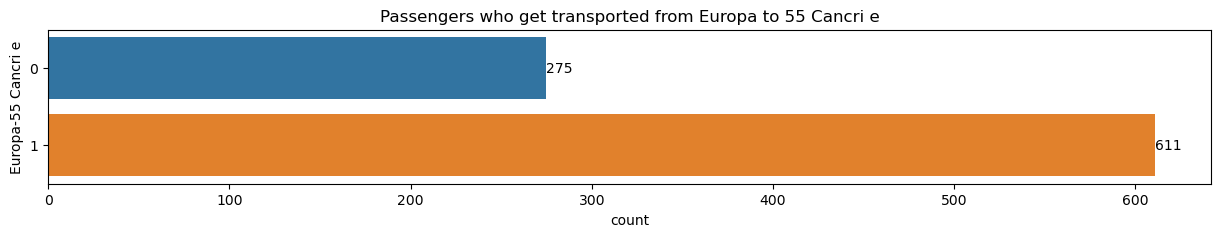

Percent: 68.96%


In [260]:
planet_dest = temp_df['Transported'].value_counts().rename_axis('Europa-55 Cancri e').reset_index(name='count')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 2))
ax1 = sns.barplot(ax=axes, data=planet_dest, x='count', y='Europa-55 Cancri e', orient='h')
ax1.bar_label(container=ax1.containers[0])
ax1.set_title('Passengers who get transported from Europa to 55 Cancri e')
plt.show()

percent = planet_dest['count'].loc[(planet_dest['Europa-55 Cancri e'] == 1)].sum() * 100 / planet_dest['count'].sum()
print(f'Percent: {percent:.2f}%')

#### We can confirm that the number of passengers from Europe to the destination 55 Cancri e who are transported is significantly higher (68.96%)

## Until now, we can see that this are the best features correlations for get Transported:
* Passengers CryoSleep have +80%
* Passengers who waste low money on RoomService, Spa or VRDeck
* Passengers in groups 2 to 7 have more than 50%
* Passengers in groups 3 to 6 have almost more than 60%
* Passengers from Europe and destination 55 Cancri e have 68.96%

# Let's clean the data and start modeling

In [256]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Group_Size
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,1
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,1
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003,2
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003,2
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004,1


### Clean data:
* Drop Cabin / Name / PassengerId
* Transform HomePlanet / Destination

In [14]:
def group_columns(df, cols_to_group):
    for col in cols_to_group:
        for row in df[col]:
            print(row)

group_columns(train_df.head(), ['Name', 'Spa'])

Maham Ofracculy
Juanna Vines
Altark Susent
Solam Susent
Willy Santantines
0.0
549.0
6715.0
3329.0
565.0
